In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### 데이터 준비

In [2]:
df_iris = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/Iris.csv').iloc[:,1:]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 데이터 전처리

#### target 인코딩

In [3]:
# ----------------
# target 인코딩
# ----------------
class_names = {'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2}
df_iris['target'] = df_iris['Species'].map(class_names)

#### 데이터 선택

In [4]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['Species', 'target'], axis=1)
y = df_iris['target']

#### 학습용 데이터와 테스트용 데이터 분할

In [5]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 교차검증

- 모델의 평가 방법

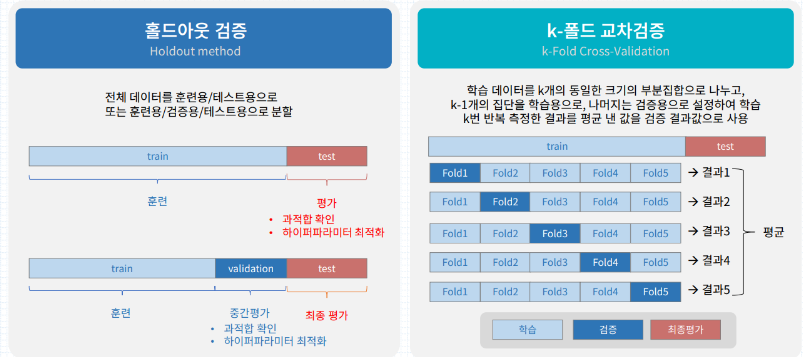

| 구분 | 홀드아웃 검증 (현재 방식) | K-폴드 교차 검증 |
| :--- | :--- | :--- |
| **분리 횟수** | 1회 (Train vs Test) | K회 (K개의 폴드 생성 후 K번 학습 및 평가) |
| **단점** | 한 번의 분할에 따라 성능이 편향될 수 있음 | 계산 비용(시간)이 더 많이 소요됨 |
| **장점** | 빠르고 간단함 | 모든 데이터를 훈련과 검증에 사용하므로, 성능 평가의 신뢰도가 높음 |

- 홀드아웃 검증: 전체 데이터를 **훈련/테스트 세트**로 단 한 번 분리하여, 훈련 세트로 모델을 학습하고 테스트 세트로 최종 성능을 평가하는 방법
- pred(예측값)와 y_test(실제값)를 비교하여 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 등을 계산했다면 홀드아웃 검증 완료


#### 훈련 데이터로 교차검증

In [6]:
# --------------------
# kfold 객체 생성
# --------------------
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

- **KFold와 StratifiedKFold의 차이**

    모두 **K-겹 교차 검증(K-Fold Cross-Validation)**을 수행하기 위해 데이터를 $K$개의 폴드(Fold)로 나누는 방법

    핵심적인 차이는 데이터를 나눌 때 **타겟 변수(클래스)의 분포를 고려하는지 여부**

1. **KFold (일반 K-겹 교차 검증)**

    KFold는 데이터를 나눌 때 **타겟 변수($Y$)의 클래스 분포**를 고려하지 않고 **무작위**로 나눔

- 작동 방식: 전체 데이터를 $K$개의 동일한 크기의 연속적인 청크(chunk)로 나눔

- 문제점: 특히 **클래스 불균형(Imbalanced Classes)**이 있는 데이터셋에서 문제가 됨
 
    무작위 분할로 인해 특정 폴드에는 소수 클래스의 샘플이 너무 적게 들어가거나, 심지어 아예 포함되지 않을 수도 있음

- 사용 적합성: 주로 **회귀(Regression) 문제**나 클래스 분포가 **완벽하게 균형 잡힌** 분류 문제에 사용

2. **StratifiedKFold (계층적 K-겹 교차 검증)**

    StratifiedKFold는 데이터를 나눌 때 **타겟 변수($Y$)의 클래스 비율을 보존**하면서 나눔 (stratify=y 옵션과 같은 원리)

- 작동 방식: 데이터를 $K$개의 폴드로 나눌 때, 전체 데이터셋에 존재하는 각 클래스의 비율이 **각각의 폴드**에도 거의 **동일하게 유지**되도록 샘플을 배분

- 장점: 모든 폴드가 전체 데이터셋의 클래스 분포를 대표하게 되므로, 각 반복 학습 및 평가의 결과가 훨씬 더 **안정적이고 신뢰**할 수 있게 됨  
 소수 클래스가 어느 폴드에서도 누락되지 않도록 보장
 
- 사용 적합성: **분류(Classification) 문제**에 필수적으로 사용되어야 하는 방법

<br>

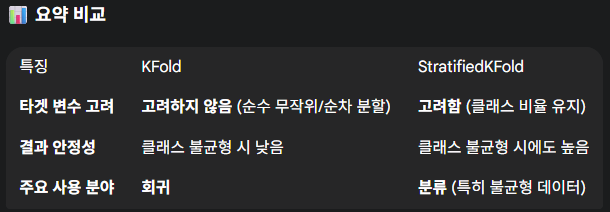

In [7]:
# --------------------
# 모델 객체 생성
# --------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [8]:
# --------------------
# 교차검증 수행
# --------------------
from sklearn.model_selection import cross_val_score

cv_scores_accuracy = cross_val_score(model, 
                                     X = X_train, 
                                     y = y_train, 
                                     scoring='accuracy', 
                                     cv=skf)

print(cv_scores_accuracy)
print(cv_scores_accuracy.mean())                            

[0.95833333 0.95833333 0.95833333 0.95833333 0.91666667]
0.95


#### 훈련데이터 전체로 재학습

- 훈련 데이터 전체로 재학습 하는 이유: 교차 검증의 목적과 최종 모델 학습의 목적이 서로 다르기 때문에 필요  

    교차 검증은 **모델의 성능을 평가**하는 단계이며, 재학습은 평가된 성능을 바탕으로 **실제 서비스에 투입될 최종 모델**을 만드는 단계

<br>

**1. 교차 검증의 목적: 모델 평가 (진단)**

cross_val_score를 이용한 교차 검증의 주된 목적

- 성능의 신뢰성 확보: 훈련 데이터(X_train, y_train)를 5개의 작은 폴드로 나누어 모델을 5번 학습하고 평가  
     이 5개의 정확도 점수(cv_scores_accuracy)의 평균을 통해 모델의 성능이 특정 데이터 분할에 편향되지 않았음을 확인

- 하이퍼파라미터 튜닝의 기준: 만약 여러 모델(예: Decision Tree, Random Forest)이나 여러 하이퍼파라미터 설정(예: max_depth=3, max_depth=5)을 비교한다면,  
교차 검증 점수(cv_scores_accuracy.mean())가 가장 좋은 모델을 선택하는 기준이 됨

💡 핵심: 교차 검증 단계에서 생성되는 5개의 모델은 평가 목적으로만 사용될 뿐, 최종적으로 서비스에 사용될 모델은 아님

**2. 훈련 데이터 전체로 재학습하는 이유: 최종 모델 생성 (활용)**

실제 예측에 사용할 최종 모델을 만들어야 함

- 데이터 활용 극대화: 교차 검증 단계에서는 매번 전체 훈련 데이터 중 일부($4/5$)만을 학습에 사용  
     하지만 최종 모델은 가장 강력한 성능을 내야 하므로, **활용 가능한 모든 훈련 데이터($X\_train$ 전체)**를 사용하여 모델을 다시 학습시켜야 함
     
- 더 나은 일반화 성능: 데이터를 많이 학습시킬수록 모델은 데이터의 패턴을 더 깊이 이해하고, 결과적으로 실제 서비스에서 더 나은 일반화 성능을 보일 가능성이 높음

💡 요약: 교차 검증은 **"이 모델이 좋은가?"**를 확인하는 단계이고, 훈련 데이터 전체로의 재학습은 "확인된 좋은 모델을 가장 강력하게 만드는" 단계

In [9]:
# 훈련데이터 전체 재학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 테스트데이터로 최종 평가

In [10]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [11]:
# 최종적으로 학습된 모델 객체의 하이퍼파라미터 값 확인

# 1. max_depth 값 확인
final_max_depth = model.get_depth()
print(f"최종 모델의 max_depth: {final_max_depth}")

# 2. min_samples_split 값 확인 (모델 객체의 속성에서 직접 가져옴)
final_min_samples_split = model.get_params()['min_samples_split']
print(f"최종 모델의 min_samples_split: {final_min_samples_split}")

최종 모델의 max_depth: 5
최종 모델의 min_samples_split: 2


### 전체 데이터로 최종 모델 재학습 <- 하지 않는 것이 좋음

In [ ]:
# model = DecisionTreeClassifier()
# model.fit(X, y)

테스트 데이터($X\_test$, $y\_test$)를 훈련에 포함시키므로 위 코드는 실행하지 않는 것이 좋음

테스트 데이터는 모델의 성능을 가장 마지막에 딱 한 번 평가하기 위해 절대로 학습에 사용되어서는 안 됨

만약 테스트 데이터까지 학습에 사용된다면, 일반화 성능을 측정할 객관적인 기준을 잃게 됨  

이후 이 모델의 성능을 측정하더라도, 테스트 데이터를 이미 보았기 때문에 실제 서비스에 투입했을 때의 성능을 과대평가하게 됨